## importation des bibliotheques

In [1]:
# importation des librairies
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing  import PolynomialFeatures
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

## quelques petites manipulations sur notre dataset

In [2]:
# importer le dataset
dataset=pd.read_csv("graph.csv",sep=";")



In [3]:
#affichage de nos cinq premiers enregistrements
dataset.head()

,Year,Land_Annual
0,1880,-0.62
1,1881,-0.41
2,1882,-0.50
3,1883,-0.59
4,1884,-0.86


In [10]:
#verifions les valeurs manquates par observation
dataset.isnull().sum()

Year           0
Land_Annual    0
dtype: int64

## creation et entrainement de notre modele

In [4]:
# extration des variables independantes
x=dataset.iloc[:,:-1].values
# extration des variables dependantes
y=dataset.iloc[:,-1].values



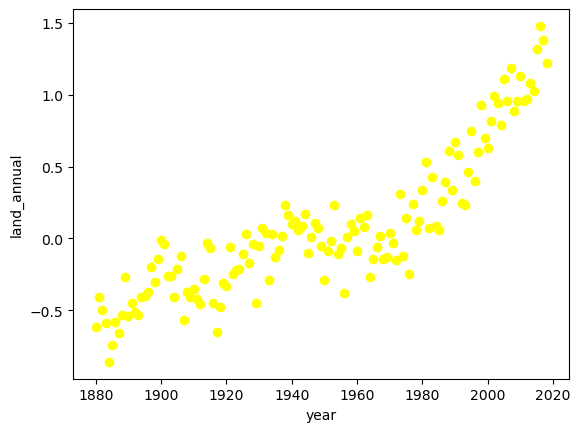

In [13]:
#visualisation graphiques des donnees sous forme de nuage de point

plt.scatter(x,y,color="yellow")
plt.xlabel("year")
plt.ylabel("land_annual")
plt.show()

In [15]:
#separation des donnees en donnees_test et donnees_d`entraitrement
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

In [16]:
#creation et entraitrement de notre modele lineraRegression
model_LR=LinearRegression()
model_LR.fit(x_train,y_train)
y_pred=model_LR.predict(x_test)



In [22]:
# calcule de la performance du model
accuracy=r2_score(y_test,y_pred)
print("accuracy is",accuracy)

accuracy is 0.7196816995786284


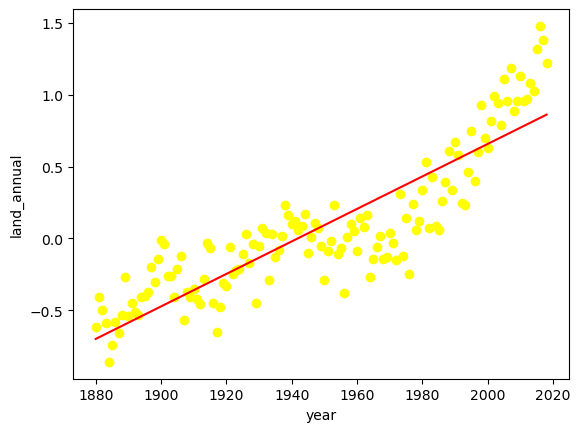

In [9]:
# visualisation du resultat
plt.scatter(x,y,color="yellow")
plt.plot(x,model_LR.predict(x),color="red")
plt.xlabel("year")
plt.ylabel("land_annual")
plt.show()

In [23]:
#creation et entraitrement d un modele de regression polynomial
poly_reg=PolynomialFeatures(degree=3)
x_poly=poly_reg.fit_transform(x_train)
regressor_poly=LinearRegression()
regressor_poly.fit(x_poly,y_train)
poly_pred_y=poly_reg.fit_transform(x_test)


poly_pred_y=regressor_poly.predict(poly_pred_y)


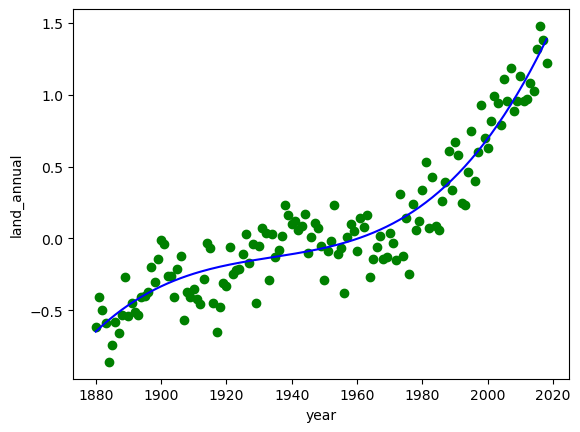

In [24]:
# visualisation du resultat de polylinearRegression
plt.scatter(x,y,color="green")
plt.plot(x,regressor_poly.predict(poly_reg.fit_transform(x)),color="blue")
plt.xlabel("year")
plt.ylabel("land_annual")
plt.show()

In [26]:
# calcule de la performance du model
r3=r2_score(y_test,poly_pred_y)

r3


0.8566817501764314